#### 1 Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('Dataset.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [2]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [3]:
print(df.shape)
print(df.dtypes)
df.head()
df.tail()
df.sample(5)

(535178, 10)
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
531406,19,'C1559091388','4','F','28007','M348934600','28007','es_transportation',43.78,0
231271,46,'C118437987','2','M','28007','M348934600','28007','es_transportation',7.60,0
510978,115,'C1896147467','2','F','28007','M348934600','28007','es_transportation',16.78,0
148635,148,'C450548035','3','M','28007','M2122776122','28007','es_home',399.86,1
132035,99,'C1585648581','4','F','28007','M1823072687','28007','es_transportation',22.67,0


In [4]:
# Null check
df.isnull().sum()

# Data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB


In [5]:
!git remote -v

origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (fetch)
origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (push)


In [6]:
!git remote set-url origin https://github.com/Rmp2404/HSBC_Hackathon_2025.git

In [7]:
!git add .
!git commit -m "Null Values and Data Types"
!git push -u origin main

[main b8599d7] Null Values and Data Types
 2 files changed, 12637 insertions(+), 20165 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   baa2d08..b8599d7  main -> main


fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


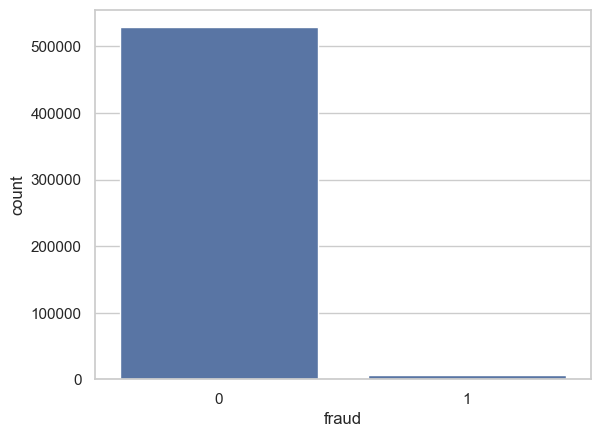

In [8]:
# Distribution of target
sns.countplot(data=df, x='fraud')
fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print(fraud_rate)

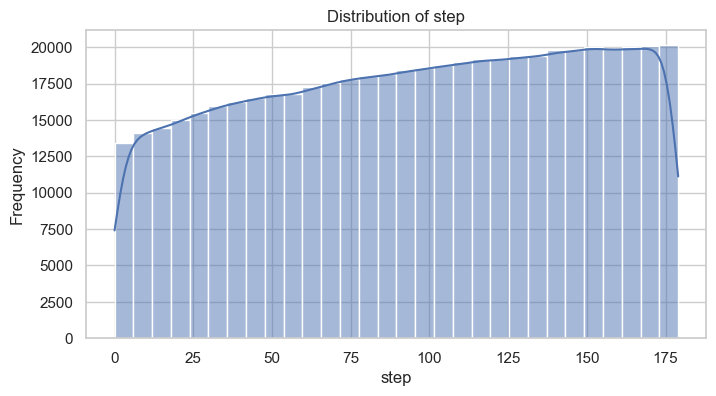

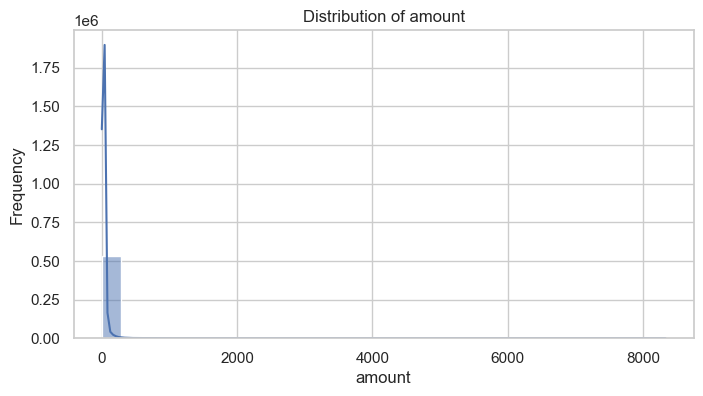

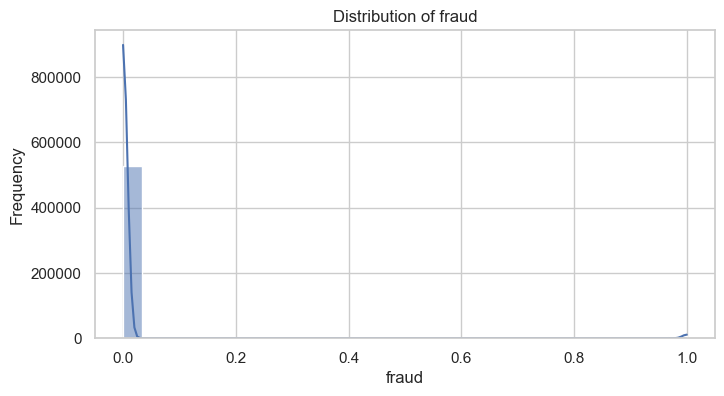

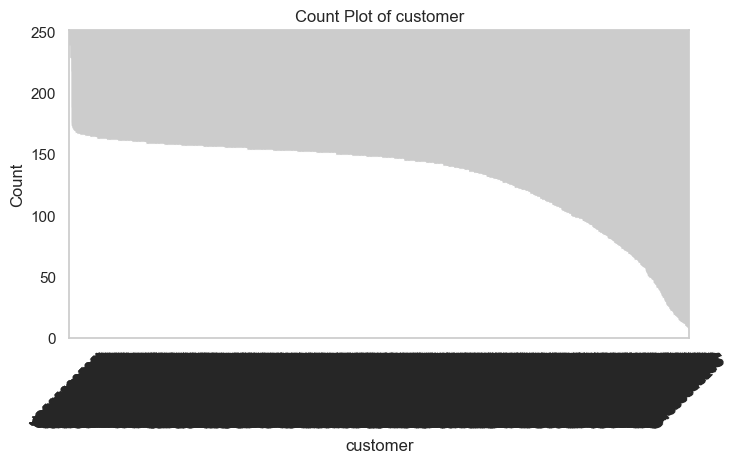

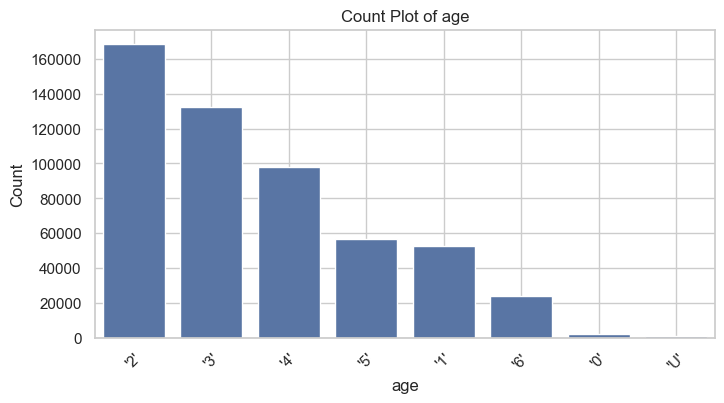

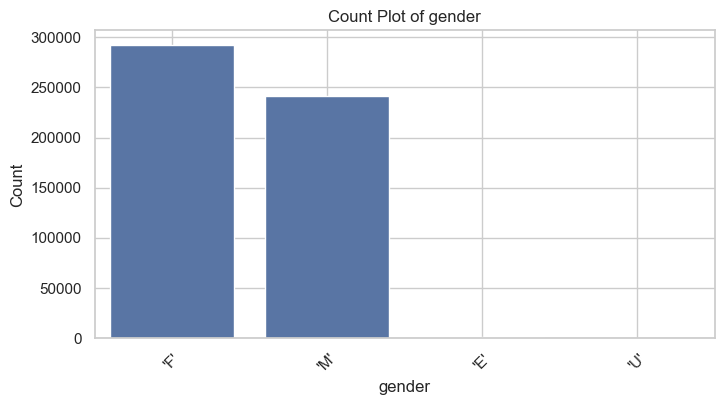

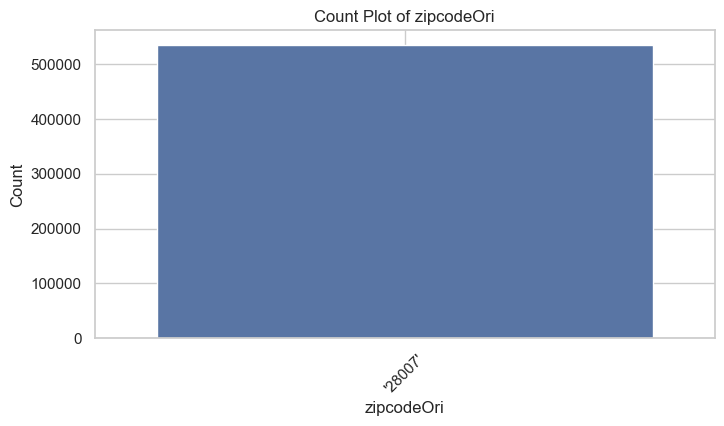

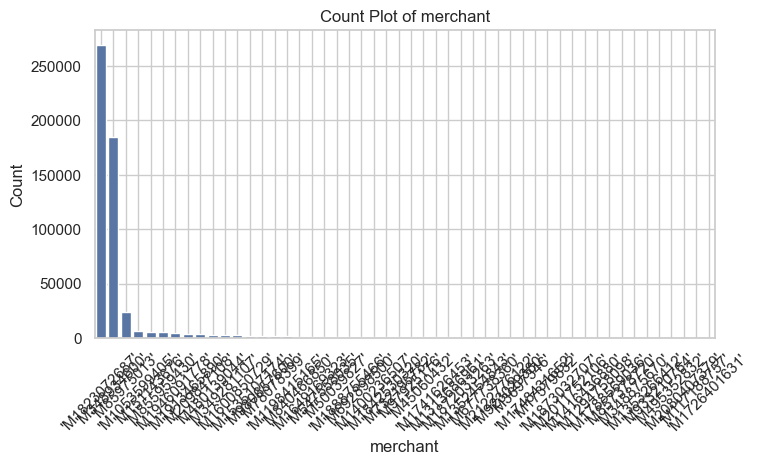

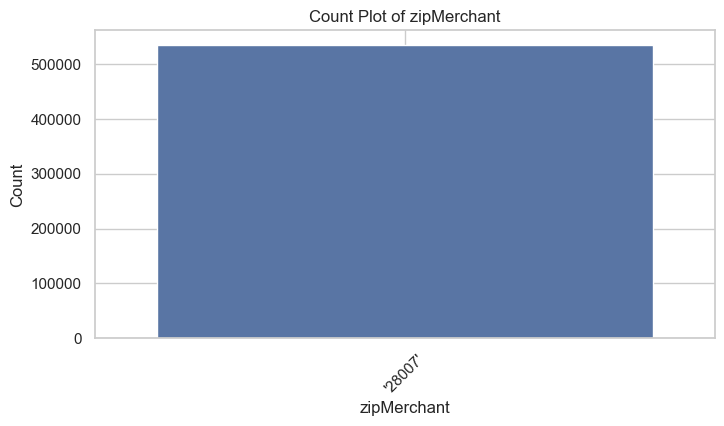

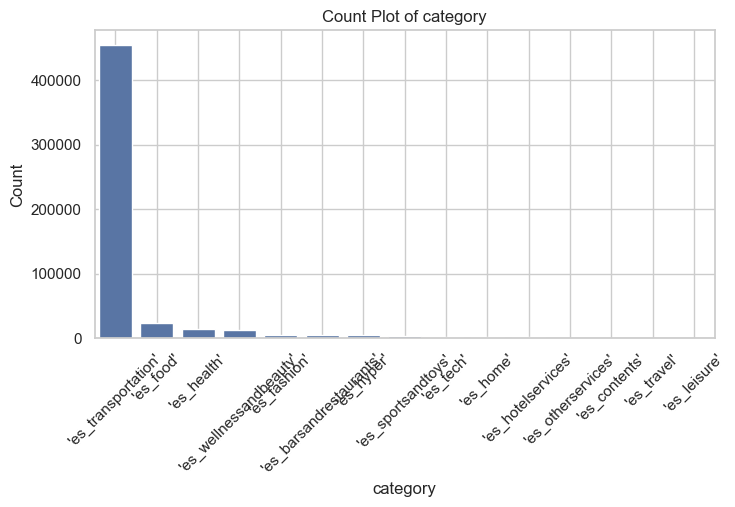

In [9]:
def univariate_numerical(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
def univariate_categorical(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
# assuming your DataFrame is called df
univariate_numerical(df)
univariate_categorical(df)



In [10]:
!git add .
!git commit -m "Target Distribution and Class Imbalance"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


In [283]:
# Unique value count
cat_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check a few example values
df[cat_cols].apply(lambda x: x.unique()[:5])

customer: 4112 unique values
gender: 4 unique values
zipcodeOri: 1 unique values
merchant: 50 unique values
zipMerchant: 1 unique values
category: 15 unique values


customer       ['C1760492708', 'C1222389110', 'C879949041', '...
gender                                      ['F', 'M', 'E', 'U']
zipcodeOri                                             ['28007']
merchant       ['M1823072687', 'M692898500', 'M348934600', 'M...
zipMerchant                                            ['28007']
category       ['es_transportation', 'es_health', 'es_fashion...
dtype: object

In [11]:
# Drop useless columns
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)


In [12]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0
4,152,'C671449181','3','F','M692898500','es_health',9.05,0
...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0


In [13]:
df_copy=df.copy()

#### 3 Categorical to num conversion and aggregation

In [24]:
customer_agg = feature_matrix_copy.groupby('customer').agg({
    'amount': ['count', 'sum', 'mean', 'max', 'min', 'std'],
    'step': ['mean', 'max', 'min', 'std'],
    'fraud': ['sum', 'mean'],  # sum = total frauds, mean = fraud rate
}).reset_index()

# Flatten column names
customer_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in customer_agg.columns]


C:\Users\R Madhapreetha\AppData\Local\Temp\ipykernel_16276\1627077485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_agg = feature_matrix_copy.groupby('customer').agg({


In [25]:
merchant_agg = feature_matrix_copy.groupby('merchant').agg({
    'amount': ['count', 'sum', 'mean', 'max', 'min', 'std'],
    'step': ['mean', 'max', 'min', 'std'],
    'fraud': ['sum', 'mean'],  # fraud count and rate
}).reset_index()

# Flatten column names
merchant_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in merchant_agg.columns]


C:\Users\R Madhapreetha\AppData\Local\Temp\ipykernel_16276\3135240228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merchant_agg = feature_matrix_copy.groupby('merchant').agg({


In [26]:
feature_matrix_copy = feature_matrix_copy.merge(customer_agg, left_on='customer', right_on='customer_', how='left')
feature_matrix_copy = feature_matrix_copy.merge(merchant_agg, left_on='merchant', right_on='merchant_', how='left')


In [27]:
feature_matrix_copy

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0,'C1760492708',163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0,'C1222389110',159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0,'C879949041',145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0,'C409740988',154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,4,152,'C671449181','3','F','M692898500','es_health',9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,'3','es_health','F','M480139044',76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,'2','es_health','C1001065306','F',96.326950,50.150126,88352.14,62722.0,0,'C671449181',19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,'M692898500',805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,

In [354]:
feature_matrix_copy['age'] = feature_matrix_copy['age'].str.strip("'")  # Remove surrounding quotes

# Replace 'U' with a placeholder value (like -1 or the mode)
feature_matrix_copy['age'] = feature_matrix_copy['age'].replace('U', -1)

# Now convert to int
feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(int)


In [388]:
feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(str).str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\R Madhapreetha\AppData\Local\Temp\ipykernel_12132\3559287429.py:1: SyntaxWarning: invalid escape sequence '\d'
  feature_matrix_copy['age'] = feature_matrix_copy['age'].astype(str).str.extract('(\d+)').astype(int)


In [389]:
# Convert all except gender/category (which may still be categorical)
for col in feature_matrix_copy.columns:
    if col not in ['gender', 'category','customer','merchant']:
        feature_matrix_copy[col] = pd.to_numeric(feature_matrix_copy[col], errors='coerce')


In [391]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy of feature_matrix
df_try = feature_matrix_copy.copy()

# 1. Strip quotes if necessary (you have values like 'F')
for col in df_try.select_dtypes(include='object').columns:
    df_try[col] = df_try[col].str.strip("'").fillna("missing")

# 2. Encode categorical features using LabelEncoder
label_encoders = {}
for col in ['gender', 'category', 'customer', 'merchant']:
    le = LabelEncoder()
    df_try[col] = le.fit_transform(df_try[col])
    label_encoders[col] = le

# 3. Now safely convert everything else to numeric
for col in df_try.columns:
    if col not in ['gender', 'category', 'customer', 'merchant']:
        df_try[col] = pd.to_numeric(df_try[col], errors='coerce')

# 4. Optionally fill remaining NaNs (from numeric columns)
df_try.fillna(0, inplace=True)

# Now df is fully numeric and ready for train/test/SMOTE/model


In [400]:
df_try

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,0,11,1648,1,1,18,12,52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,0.0,0.0,0.0,0.0,24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,1,172,496,3,2,18,12,14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,0.0,0.0,0.0,0.0,25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,2,106,3858,3,1,18,12,3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,0.0,0.0,0.0,0.0,20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,3,86,2879,5,2,18,12,61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,0.0,0.0,0.0,0.0,27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,4,152,3412,3,1,39,4,9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,0.0,0.0,0.0,0.0,76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,0.0,0.0,0.0,0.0,96.326950,50.150126,88352.14,62722.0,0,0.0,19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,0.0,805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,1981,5,1,30,12,38.12,152,84.43,179.0,28.777303,94.164474,0.17,5.0,0.0,0.0,0.0,0.0,18.595297,50.039513,4374.15,14313.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0,0.0,152,4374.

In [393]:
print(df_try.dtypes)
print(df_try.head())

transaction_id      int64
step                int64
customer            int64
age                 int64
gender              int64
                   ...   
step_max_y          int64
step_min_y          int64
step_std_y        float64
fraud_sum_y         int64
fraud_mean_y      float64
Length: 65, dtype: object
   transaction_id  step  customer  age  gender  merchant  category  amount  \
0               0    11      1648    1       1        18        12   52.35   
1               1   172       496    3       2        18        12   14.75   
2               2   106      3858    3       1        18        12    3.73   
3               3    86      2879    5       2        18        12   61.42   
4               4   152      3412    3       1        39         4    9.05   

   customers.COUNT(transactions)  customers.MAX(transactions.amount)  \
0                            163                              160.41   
1                            159                              194.83   
2  

In [394]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid changing the original
df_encoded = df_try.copy()

# List of categorical columns to encode
categorical_cols = ['gender', 'category']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [395]:
df_encoded

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,0,11,1648,1,1,18,12,52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,0.0,0.0,0.0,0.0,24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,1,172,496,3,2,18,12,14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,0.0,0.0,0.0,0.0,25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,2,106,3858,3,1,18,12,3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,0.0,0.0,0.0,0.0,20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,3,86,2879,5,2,18,12,61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,0.0,0.0,0.0,0.0,27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0,0.0,154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,4,152,3412,3,1,39,4,9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,0.0,0.0,0.0,0.0,76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,0.0,0.0,0.0,0.0,96.326950,50.150126,88352.14,62722.0,0,0.0,19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,0.0,805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,535173,40,1981,5,1,30,12,38.12,152,84.43,179.0,28.777303,94.164474,0.17,5.0,0.0,0.0,0.0,0.0,18.595297,50.039513,4374.15,14313.0,184938,118.07,179.0,26.946570,76.560545,0.00,0.0,0.0,0.0,0.0,0.0,17.528205,50.704773,4983444.75,14158954.0,0,0.0,152,4374.

In [397]:
print(df_encoded.dtypes)
print(df_encoded.head())

transaction_id      int64
step                int64
customer            int64
age                 int64
gender              int64
                   ...   
step_max_y          int64
step_min_y          int64
step_std_y        float64
fraud_sum_y         int64
fraud_mean_y      float64
Length: 65, dtype: object
   transaction_id  step  customer  age  gender  merchant  category  amount  \
0               0    11      1648    1       1        18        12   52.35   
1               1   172       496    3       2        18        12   14.75   
2               2   106      3858    3       1        18        12    3.73   
3               3    86      2879    5       2        18        12   61.42   
4               4   152      3412    3       1        39         4    9.05   

   customers.COUNT(transactions)  customers.MAX(transactions.amount)  \
0                            163                              160.41   
1                            159                              194.83   
2  

In [370]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['customer', 'merchant']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


#### 2 Feature Engineering


In [14]:
df_copy['transaction_id'] = df_copy.index

In [15]:
import featuretools as ft

# Create an empty EntitySet
es = ft.EntitySet(id="fraud_data")

# Add the base dataframe
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df_copy.drop(columns=['fraud']),  # Drop target to prevent leakage
    index="transaction_id",                # You must have a unique ID column            
)


C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\P

In [16]:
# Normalize customer entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="customers",
    index="customer"
)

# Normalize merchant entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="merchants",
    index="merchant"
)


In [17]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="transactions",
    agg_primitives=["mean", "sum", "count", "mode", "std", "max", "min"],
    trans_primitives=["month", "weekday", "hour", "day"],
    max_depth=2,
    verbose=True
)

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'hour', 'month', 'weekday']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 37 features
Elapsed: 00:00 | Progress:   0%|                                                                                       

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x000001FFEA0823E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x000001FFEA082520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided ca

Elapsed: 00:01 | Progress:  52%|████████████████████████████████████████████▉                                          

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x000001FFEA080FE0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x000001FFEA082520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided calla

Elapsed: 00:05 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [18]:
print(feature_matrix.head())

                step       customer  age gender       merchant  \
transaction_id                                                   
0                 11  'C1760492708'  '1'    'F'  'M1823072687'   
1                172  'C1222389110'  '3'    'M'  'M1823072687'   
2                106   'C879949041'  '3'    'F'  'M1823072687'   
3                 86   'C409740988'  '5'    'M'  'M1823072687'   
4                152   'C671449181'  '3'    'F'   'M692898500'   

                           category  amount  customers.COUNT(transactions)  \
transaction_id                                                               
0               'es_transportation'   52.35                            163   
1               'es_transportation'   14.75                            159   
2               'es_transportation'    3.73                            145   
3               'es_transportation'   61.42                            154   
4                       'es_health'    9.05                          

In [19]:
feature_matrix.head(20).style.set_sticky()

,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step)
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.350000,163,160.410000,178.000000,29.707914,90.269939,0.240000,0.000000,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.390000,14714.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.750000,159,194.830000,179.000000,29.407547,89.584906,0.170000,0.000000,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.800000,14244.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
2,106,'C879949041','3','F','M1823072687','es_transportation',3.730000,145,135.920000,178.000000,29.027793,89.593103,0.340000,2.000000,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.030000,12991.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
3,86,'C409740988','5','M','M1823072687','es_transportation',61.420000,154,189.110000,179.000000,31.522208,92.623377,0.530000,0.000000,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.420000,14264.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
4,152,'C671449181','3','F','M692898500','es_health',9.050000,19,316.030000,163.000000,84.684737,102.631579,9.050000,0.000000,'3','es_health','F','M480139044',76.658094,53.958019,1609.010000,1950.000000,805,904.510000,179.000000,109.754211,77.915528,0.180000,0.000000,'2','es_health','C1001065306','F',96.326950,50.150126,88352.140000,62722.000000
5,161,'C117112395','3','F','M1823072687','es_transportation',26.440000,163,270.960000,179.000000,33.290184,92.472393,0.040000,0.000000,'3','es_transportation','F','M1823072687',35.308278,52.761789,5426.300000,15073.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
6,145,'C1449000407','2','M','M1823072687','es_transportation',21.620000,158,82.940000,179.000000,28.112152,91.670886,0.880000,0.000000,'2','es_transportation','M','M1823072687',18.736177,52.516475,4441.720000,14484.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
7,141,'C1266329800','4','F','M1823072687','es_transportation',18.390000,148,166.750000,179.000000,30.021622,92.385135,0.570000,0.000000,'4','es_transportation','F','M348934600',22.516502,52.529943,4443.200000,13673.000000,269

In [20]:
feature_matrix = feature_matrix.reset_index()  # To bring transaction_id into a column
df['transaction_id'] = df.index                # If not already there

# Merge back the target
feature_matrix = feature_matrix.merge(df[['transaction_id', 'fraud']], on='transaction_id', how='left')

In [21]:
!git add .
!git commit -m "Feature Engineering"
!git push

[main dac533f] Feature Engineering
 1 file changed, 79 insertions(+), 68 deletions(-)


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   b8599d7..dac533f  main -> main


In [22]:
feature_matrix_copy=feature_matrix.copy()

In [23]:
feature_matrix_copy.head()

,transaction_id,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),fraud
0,0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,163,160.41,178.0,29.707914,90.269939,0.24,0.0,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.39,14714.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
1,1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,159,194.83,179.0,29.407547,89.584906,0.17,0.0,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.80,14244.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
2,2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,145,135.92,178.0,29.027793,89.593103,0.34,2.0,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.03,12991.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
3,3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,154,189.11,179.0,31.522208,92.623377,0.53,0.0,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.42,14264.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.28,29002763.0,0
4,4,152,'C671449181','3','F','M692898500','es_health',9.05,19,316.03,163.0,84.684737,102.631579,9.05,0.0,'3','es_health','F','M480139044',76.658094,53.958019,1609.01,1950.0,805,904.51,179.0,109.754211,77.915528,0.18,0.0,'2','es_health','C1001065306','F',96.326950,50.150126,88352.14,62722.0,0


#### 4 Train-Test split

In [401]:
from sklearn.model_selection import train_test_split

X = df_try.drop(columns=['transaction_id', 'fraud'])
y = df_try['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [403]:
X_train

,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step),customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
137390,164,1407,2,1,18,12,49.43,119,271.30,179.0,29.752521,108.983193,0.21,31.0,0.0,0.0,0.0,0.0,28.517681,41.468588,3540.55,12969.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0.0,119,3540.55,29.752521,271.30,0.21,28.517681,108.983193,179,31,41.468588,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.0
218532,34,533,2,2,18,12,27.50,130,210.24,179.0,33.531769,104.261538,0.35,32.0,0.0,0.0,0.0,0.0,29.216000,42.724746,4359.13,13554.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0.0,130,4359.13,33.531769,210.24,0.35,29.216000,104.261538,179,32,42.724746,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.0
67389,166,543,4,1,45,3,51.37,143,219.77,179.0,32.977203,104.391608,0.74,20.0,0.0,0.0,0.0,0.0,31.310136,43.607409,4715.74,14928.0,23562,154.91,179.0,37.172897,106.992870,0.00,0.0,0.0,0.0,0.0,0.0,24.997388,47.702006,875867.81,2520966.0,0.0,143,4715.74,32.977203,219.77,0.74,31.310136,104.391608,179,20,43.607409,0,0.000000,0.0,23562,875867.81,37.172897,154.91,0.00,24.997388,106.992870,179,0,47.702006,0,0.0
169316,175,3504,4,2,18,12,4.52,155,166.36,179.0,32.034968,91.612903,0.01,0.0,0.0,0.0,0.0,0.0,26.210559,52.814843,4965.42,14200.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0.0,155,4965.42,32.034968,166.36,0.01,26.210559,91.612903,179,0,52.814843,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.0
251107,132,3091,2,1,18,12,47.66,152,92.94,179.0,27.312566,92.828947,0.10,0.0,0.0,0.0,0.0,0.0,19.777786,51.158988,4151.51,14110.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0.0,152,4151.51,27.312566,92.94,0.10,19.777786,92.828947,179,0,51.158988,0,0.000000,0.0,269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355189,111,1919,2,1,18,12,3.10,123,759.41,177.0,41.802764,106.739837,0.57,20.0,0.0,0.0,0.0,0.0,75.924071,42.942363,5141.74,13129.0,269636,115.26,179.0,26.954451,107.562651,0.00,0.0,0.0,0.0,0.0,0.0,17.536763,47.302679,7267890.28,29002763.0,0.0,123,5141.74,41.802764,759.41,0.57,75.924071,1

In [405]:
import pandas as pd
import numpy as np

# Correlation matrix
corr_matrix = X_train.corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train_filtered = X_train.drop(columns=to_drop)
X_test_filtered = X_test.drop(columns=to_drop)


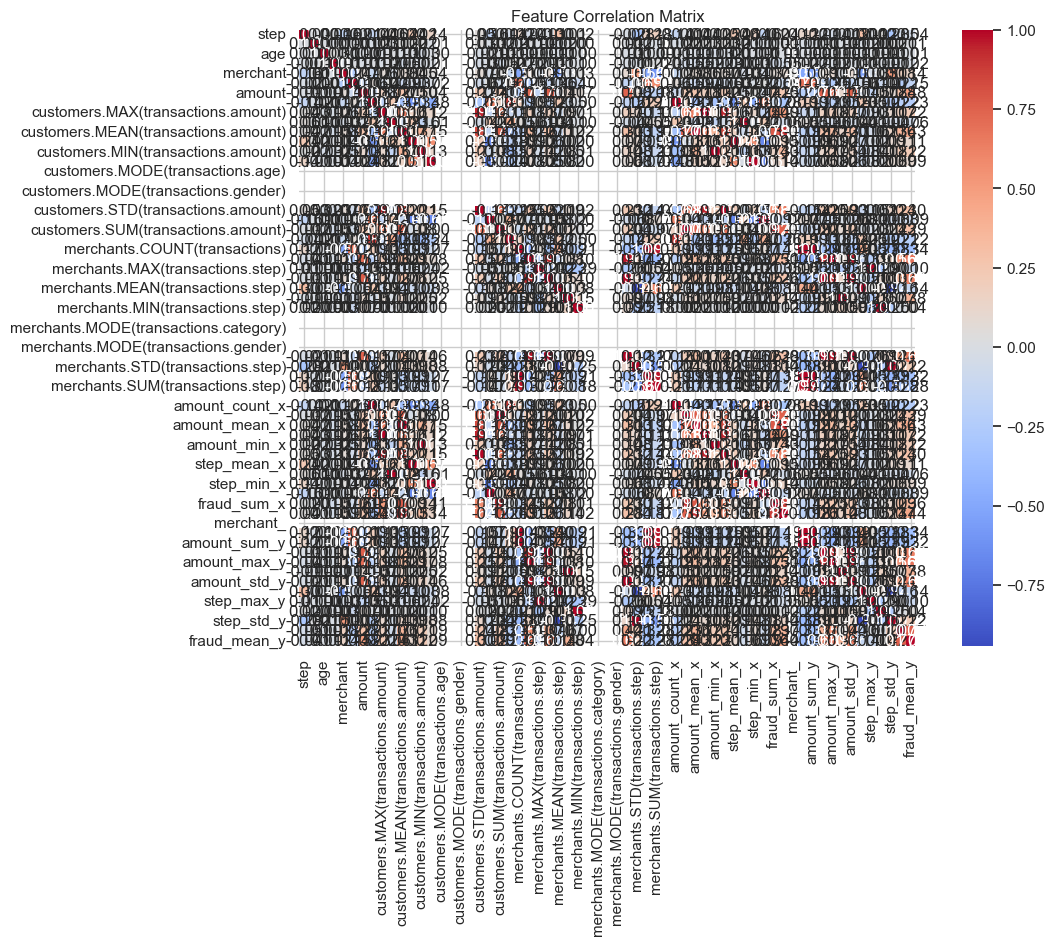

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()


In [408]:
import numpy as np

corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.)]

# Drop from train and test
X_train_filtered = X_train.drop(columns=to_drop)
X_test_filtered = X_test.drop(columns=to_drop)

print("Dropped due to high correlation:", to_drop)


Dropped due to high correlation: ['customers.STD(transactions.amount)', 'merchants.MEAN(transactions.amount)', 'merchants.STD(transactions.amount)', 'merchants.STD(transactions.step)', 'merchants.SUM(transactions.amount)', 'merchants.SUM(transactions.step)', 'amount_count_x', 'amount_sum_x', 'amount_mean_x', 'amount_max_x', 'amount_min_x', 'amount_std_x', 'step_mean_x', 'step_max_x', 'step_min_x', 'step_std_x', 'fraud_sum_x', 'fraud_mean_x', 'amount_count_y', 'amount_sum_y', 'amount_mean_y', 'amount_max_y', 'amount_min_y', 'amount_std_y', 'step_mean_y', 'step_max_y', 'step_min_y', 'step_std_y']


In [409]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Convert filtered data to tensors
X_train_tensor = torch.tensor(X_train_filtered.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_filtered.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Define Classifier
class Classifier(nn.Module):
    def __init__(self, encoding_dim=16):
        super(Classifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.classifier(x)

# Initialize Models
input_dim = X_train_filtered.shape[1]
autoencoder = Autoencoder(input_dim=input_dim)
classifier = Classifier(encoding_dim=16)

# Loss and Optimizers
ae_criterion = nn.MSELoss()
clf_criterion = nn.BCELoss()
ae_optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
clf_optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Phase 1: Train Autoencoder
print("Training Autoencoder...")
for epoch in range(20):
    autoencoder.train()
    total_loss = 0
    for X_batch, _ in train_loader:
        ae_optimizer.zero_grad()
        _, decoded = autoencoder(X_batch)
        loss = ae_criterion(decoded, X_batch)
        loss.backward()
        ae_optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: AE Loss = {total_loss / len(train_loader):.4f}")

# Phase 2: Train Classifier on Encoded Features
print("\nTraining Classifier...")
for epoch in range(20):
    classifier.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        with torch.no_grad():
            encoded, _ = autoencoder(X_batch)
        clf_optimizer.zero_grad()
        preds = classifier(encoded)
        loss = clf_criterion(preds, y_batch)
        loss.backward()
        clf_optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Classifier Loss = {total_loss / len(train_loader):.4f}")

#  Evaluation
autoencoder.eval()
classifier.eval()
with torch.no_grad():
    encoded_test, _ = autoencoder(X_test_tensor)
    y_pred_probs = classifier(encoded_test)
    y_pred = (y_pred_probs >= 0.5).int().numpy()
    y_true = y_test_tensor.numpy()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.